In [ ]:
#check if python is installed
try:
  !python --version
except:
  print("It does not look like python is installed")

Python 3.6.9


Importing Data

mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import from kaggle.json from local to drive
!pip install -q kaggle
from google.colab import files
files.upload()

Saving USvideos.csv to USvideos.csv


In [ ]:
#import modules
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn import metrics 


#load file
def load_csv(file):
	df = pd.read_csv(file)
	return df


#main
if __name__== "__main__":
  date_file = "USvideos.csv"

df = pd.read_csv("USvideos.csv")

df = df.iloc[:21000,:]


familiarize myself with the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                21000 non-null  object
 1   trending_date           21000 non-null  object
 2   title                   21000 non-null  object
 3   channel_title           21000 non-null  object
 4   category_id             21000 non-null  int64 
 5   publish_time            21000 non-null  object
 6   tags                    21000 non-null  object
 7   views                   21000 non-null  int64 
 8   likes                   21000 non-null  int64 
 9   dislikes                21000 non-null  int64 
 10  comment_count           21000 non-null  int64 
 11  thumbnail_link          21000 non-null  object
 12  comments_disabled       21000 non-null  bool  
 13  ratings_disabled        21000 non-null  bool  
 14  video_error_or_removed  21000 non-null  bool  
 15  de

In [ ]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [ ]:
#Check for null values
null = df.isna().sum()

for key in null.keys():
    if(null[key] > 0):
        print(key,":",null[key])


description : 570


In [ ]:
#turn boolean labels into 1/0
df["comments_disabled"] = df["comments_disabled"].astype(int)
df["ratings_disabled"] = df["ratings_disabled"].astype(int)
df["video_error_or_removed"] = df["video_error_or_removed"].astype(int)

separate dates into respective columns

In [ ]:
#clean publish date

df['publish_time'] = pd.to_datetime(df["publish_time"], format = '%Y-%m-%d')


In [ ]:
#clean trending date

df['trending_date'] = pd.to_datetime(df["trending_date"], format = '%y.%d.%m')


In [ ]:
#create new columns
df['td_month'] = df['trending_date'].dt.month
df['td_day'] = df['trending_date'].dt.day
df['td_year'] = df['trending_date'].dt.year
df['p_month'] = df['publish_time'].dt.month
df['p_day'] = df['publish_time'].dt.day
df['p_year'] = df['publish_time'].dt.year

In [ ]:
for month in df["p_month"]:
  print(month)

decision tree

In [ ]:
#drop fields that cannot be ran through model or relevant
df = df.drop(['trending_date','video_id', 'title', 'channel_title', 'publish_time', 'tags',
             'thumbnail_link', 'description'], axis = 'columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   category_id             21000 non-null  int64
 1   views                   21000 non-null  int64
 2   likes                   21000 non-null  int64
 3   dislikes                21000 non-null  int64
 4   comment_count           21000 non-null  int64
 5   comments_disabled       21000 non-null  int64
 6   ratings_disabled        21000 non-null  int64
 7   video_error_or_removed  21000 non-null  int64
 8   td_month                21000 non-null  int64
 9   td_day                  21000 non-null  int64
 10  td_year                 21000 non-null  int64
 11  p_month                 21000 non-null  int64
 12  p_day                   21000 non-null  int64
 13  p_year                  21000 non-null  int64
dtypes: int64(14)
memory usage: 2.2 MB


In [ ]:
#test
x = df[['category_id', 'likes', 'dislikes', 'comment_count', 
         'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'td_month',
         'td_day', 'td_year', 'p_month', 'p_day', 'p_year']]
y = df["views"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 33)

In [ ]:
#works
#x = df.drop(['views'], axis = 'columns')
x = df["views"]
y = df["dislikes"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)

In [ ]:
DecisionTree_Class_Model = DecisionTreeClassifier()

In [ ]:
DecisionTree_Class_Model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = DecisionTree_Class_Model.predict(x_test)
y_pred

array([  69408,   35487, 2223948, ...,  258476, 4181144,  488046])

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy


0.0004761904761904762

test size = .2, accuracy = .82

test size = .3, accuracy = .805

test size = .4, accuracy = .79

test size = .5, accuracy = .767

test size = .6, accuracy = .74

test size = .7, accuracy = .706

test size = .8, accuracy = .645

random forest

In [ ]:
df1 = df1.drop(['trending_date','video_id', 'title', 'channel_title', 'publish_time', 'tags',
             'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 'columns')
df1.info()



KeyError: ignored

In [ ]:
x = df1.drop(['views'], axis = 'columns')
y = df1["dislikes"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 33)

In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
rf_Model.fit(x_train, y_train)

In [ ]:
rf_Model.oob_score_

In [ ]:
print(f'Train Accuracy - : {rf_Model.score(x_train, y_train): . 3f}')
print(f'Test Accuracy - : {rf_Model.score(x_test, y_test): . 3f}')

In [ ]:
!nvidia-smi

Linear Regression

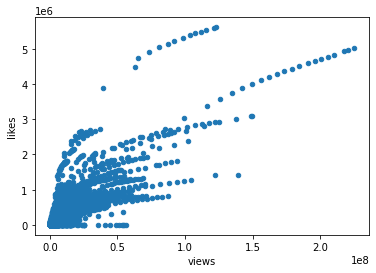

In [ ]:
df.plot(kind = 'scatter', x = 'views', y = 'likes')
plt.show()

other statistical findings

In [ ]:
average views per video

In [ ]:
#average view per trending video
average = sum(df["views"]) / len(df["views"])

print("The average view per trending video is",str(round(average,2)))

The average view per trending video is 2360784.64


In [ ]:
#min max for views
views_lst = []
for views in df["views"]:
  views_lst.append(views)

print(min(views_lst))
print(max(views_lst))

549
225211923


How long does it take for a video to trend

In [ ]:
#how long does it take for a video to trend on average
print(date_obj2 - date_obj)

28 days, 0:00:00


Most common tags

In [ ]:
#find 10 most common tags
from collections import Counter
tag_lst = []

for tags in df["tags"]:
  tag_lst.append(tags)

c = Counter(tag_lst)
c.most_common(10)

  
  


[('[none]', 1535),
 ('ABC|"americanidol"|"idol"|"american idol"|"ryan"|"seacrest"|"ryan seacrest"|"katy"|"perry"|"katy perry"|"luke"|"bryan"|"luke bryan"|"lionel"|"richie"|"lionel richie"|"season 16"|"american idol XVI"|"television"|"ad"|"spring"|"2018"|"music"|"reality"|"competition"|"song"|"sing"|"audition"|"auditions"|"performance"|"live"|"fox"|"AI"|"hollywood"|"contestant"|"official"|"american"|"official american idol"|"hollywood week"|"hometown audition"',
  87),
 ('Jacksfilms|"Jack Douglass"|"YGS"|"YGS 100"|"YGS 50"|"The Best of Your Grammar Sucks"|"Your Grammar Sucks"|"YIAY"|"Yesterday I Asked You"|"Fidget Spinners"|"Emoji Movie"|"Kermit Sings"|"JackAsk"|"Jack Ask"|"Dubstep Solves Everything"|"Frozen 2"|"iPhone Parody"|"Apple Parody"',
  80),
 ('James Corden|"The Late Late Show"|"Colbert"|"late night"|"late night show"|"Stephen Colbert"|"Comedy"|"monologue"|"comedian"|"impressions"|"celebrities"|"carpool"|"karaoke"|"CBS"|"Late Late Show"|"Corden"|"joke"|"jokes"|"funny"|"funny vi

Most Common Category Ids

Cateogry Id List:

2 - Autos & Vehicles
1 -  Film & Animation
10 - Music
15 - Pets & Animals
17 - Sports
18 - Short Movies
19 - Travel & Events
20 - Gaming
21 - Videoblogging
22 - People & Blogs
23 - Comedy
24 - Entertainment
25 - News & Politics
26 - Howto & Style
27 - Education
28 - Science & Technology
29 - Nonprofits & Activism
30 - Movies
31 - Anime/Animation
32 - Action/Adventure
33 - Classics
34 - Comedy
35 - Documentary
36 - Drama
37 - Family
38 - Foreign
39 - Horror
40 - Sci-Fi/Fantasy
41 - Thriller
42 - Shorts
43 - Shows
44 - Trailers

In [ ]:
#category id
category_lst = []
for category in df["category_id"]:
  category_lst.append(category)

c = Counter(category_lst)
c.most_common(10)

Most Common Categories that trend are: Entertainment, Music, Howto & Style, Comedy, People & Blogs

Total Likes:Dislikes

In [ ]:
#likes

likes_lst = []
for likes in df["likes"]:
  likes_lst.append(likes)

likes_total = 0
for l in range(0, len(likes_lst)):
  likes_total = likes_total + likes_lst[l]

print(likes_total)

#dislikes

dislikes_lst = []
for dislikes in df['dislikes']:
  dislikes_lst.append(dislikes)

dislikes_total = 0
for d in range(0, len(dislikes_lst)):
  dislikes_total = dislikes_total + dislikes_lst[d]

print(dislikes_total)

#ratio

print("Total likes to dislikes ratio is 20:1 or",likes_total/dislikes_total)

Min/Max for likes/dislikes

In [ ]:
print(max(likes_lst))
print(min(likes_lst))
print(max(dislikes_lst))
print(min(dislikes_lst))

In [ ]:
#ratings disabled

df["ratings_disabled"].value_counts()



In [ ]:
#comments_disabled count
df["comments_disabled"].value_counts()

In [ ]:
#percentages
ratingsdisabled = 40780/40948
commentsdisabled = 40316/40948

print(ratingsdisabled)
print(commentsdisabled)

descriptions that are empty

In [ ]:

570/40948




checking if certain channels are more likely to trend

In [ ]:
#channel count
channel_lst = []

for channel in df["channel_title"]:
  channel_lst.append(channel)

c = Counter(channel_lst)
c.most_common(10)

checking text within titles to see if there are bias words

In [ ]:
title_lst = []

for i in df["title"]:
  title_lst.append(i)

c = Counter(title_lst)
c.most_common(20)

In [ ]:

print("The average trending video takes 28 days to trend therfore on average a video would need to have", 2000000/28, "views per day")

The average trending video takes 28 days to trend therfore on average a video would need to have 71428.57142857143 views per day


average criterions for a trending video:

2+ million views

28 days to trend

Besides "None" enterainment, famous people, and comedy are the most popular tags

Most Common Categories that trend are: Entertainment, Music, Howto & Style, Comedy, People & Blogs

20:1 likes to dislikes ratio

certain channels such as ESPN, The Tonight Show Starring Jimmy Fallon, and Vox are more likely/consitently reach the trending section

Almost all videos that trend enable comments and ratings(likes/dislikes)



Create filters to go through records in datasheet to find videos that are within a set criterion

In [ ]:
def video_predictor(num):
  
